epoch:0, train acc:0.13, test acc:0.1132
epoch:1, train acc:0.12333333333333334, test acc:0.11
epoch:2, train acc:0.13666666666666666, test acc:0.1065
epoch:3, train acc:0.15333333333333332, test acc:0.113
epoch:4, train acc:0.17333333333333334, test acc:0.1337
epoch:5, train acc:0.21666666666666667, test acc:0.155
epoch:6, train acc:0.23666666666666666, test acc:0.1824
epoch:7, train acc:0.26, test acc:0.2004
epoch:8, train acc:0.31333333333333335, test acc:0.2234
epoch:9, train acc:0.35333333333333333, test acc:0.2553
epoch:10, train acc:0.37, test acc:0.2786
epoch:11, train acc:0.41, test acc:0.2943
epoch:12, train acc:0.4266666666666667, test acc:0.3081
epoch:13, train acc:0.44333333333333336, test acc:0.3224
epoch:14, train acc:0.47, test acc:0.3431
epoch:15, train acc:0.49333333333333335, test acc:0.3554
epoch:16, train acc:0.5233333333333333, test acc:0.3739
epoch:17, train acc:0.5433333333333333, test acc:0.3769
epoch:18, train acc:0.5733333333333334, test acc:0.3979
epoch:19, 

epoch:170, train acc:1.0, test acc:0.7424
epoch:171, train acc:1.0, test acc:0.7448
epoch:172, train acc:1.0, test acc:0.7459
epoch:173, train acc:1.0, test acc:0.7451
epoch:174, train acc:1.0, test acc:0.7442
epoch:175, train acc:1.0, test acc:0.7448
epoch:176, train acc:1.0, test acc:0.7458
epoch:177, train acc:1.0, test acc:0.7441
epoch:178, train acc:1.0, test acc:0.7445
epoch:179, train acc:1.0, test acc:0.7462
epoch:180, train acc:1.0, test acc:0.7476
epoch:181, train acc:1.0, test acc:0.7458
epoch:182, train acc:1.0, test acc:0.7486
epoch:183, train acc:1.0, test acc:0.7465
epoch:184, train acc:1.0, test acc:0.7456
epoch:185, train acc:1.0, test acc:0.7465
epoch:186, train acc:1.0, test acc:0.7473
epoch:187, train acc:1.0, test acc:0.7479
epoch:188, train acc:1.0, test acc:0.7473
epoch:189, train acc:1.0, test acc:0.7466
epoch:190, train acc:1.0, test acc:0.7462
epoch:191, train acc:1.0, test acc:0.7476
epoch:192, train acc:1.0, test acc:0.7479
epoch:193, train acc:1.0, test acc

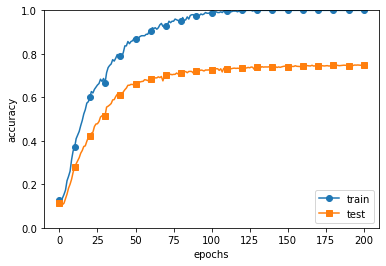

In [3]:
# coding: utf-8
import os
import sys

sys.path.append("../예제/")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
                        #weight_decay_lambda=weight_decay_lambda) ## 가중치에 패널티를 주어 오버피팅을 방지한다.

optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
